In [1]:
import sys
sys.path.append('C:\\0_Academy\\VScode\\00_Function\\')
import datetime
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Read Data

In [2]:
#read file
from A1_read_data import read_csv_data
folder = '1.1 ALL windspeed/'
file_name = 'data1719_Full_Day.csv'
data = read_csv_data(folder,file_name)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Import 'data1719_Full_Day.csv'Done


In [5]:
#from D1_stats_value import STAT_dir
#from D1_stats_value import STAT_Direction_each_M
#from D1_stats_value import read_STAT_WD

In [6]:
from D1_stats_value import Stat_Direction_Probability

In [7]:
wd_d2017,wd_p2017,mp_tab = Stat_Direction_Probability(data,2017)
wd_d2018,wd_p2018,mp_tab = Stat_Direction_Probability(data,2018)
wd_d2019,wd_p2019,mp_tab = Stat_Direction_Probability(data,2019)

44640
38399
44640
43200
43292
38461
44640
39455
35039
41408
43154
44632
44640
40320
44162
43200
43364
40453
44020
44638
42934
44640
43200
44640
44640
40320
44640
43200
44640
43200
44640
44640
43200
44635
43200
44640


In [8]:
# Concat
d2017 = wd_d2017.transpose()
d2018 = wd_d2018.transpose()
d2019 = wd_d2019.transpose()
d2017.reset_index(inplace=True)
d2018.reset_index(inplace=True)
d2019.reset_index(inplace=True)
d1719 = pd.concat([d2017,d2018])
d1719 = pd.concat([d1719,d2019])

In [9]:
# Concat
p2017 = wd_p2017.transpose()
p2018 = wd_p2018.transpose()
p2019 = wd_p2019.transpose()
p2017.reset_index(inplace=True)
p2018.reset_index(inplace=True)
p2019.reset_index(inplace=True)
p1719 = pd.concat([p2017,p2018])
p1719 = pd.concat([p1719,p2019])

p1719.reset_index(inplace=True)
p1719.rename(columns={'level_0':'mon'},inplace=True)
p1719.reset_index(inplace=True)

In [10]:
col_name = ['Year','Mon_V','Month','N','N-E-N','N-E','N-E-E',
          'E','S-E-E','S-E','S-E-S',
          'S','S-W-S','S-W','S-W-W',
          'W','N-W-W','N-W','N-W-N']
p1719.columns = col_name
p1719['Year'].iloc[0:12] = int(2017)
p1719['Year'].iloc[12:24] = int(2018)
p1719['Year'].iloc[24:] = int(2019)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
p1719.to_excel("Bubble_plot.xlsx")

# Bubble plot

In [11]:
bubble = []
for i in range(len(p1719)):
    for j in range(16):
        value =  np.array([p1719['Year'].iloc[i],p1719['Mon_V'].iloc[i],j+1,p1719.iloc[i,j+3]])
        bubble.append(value)
bubble = np.array(bubble)
bubb = pd.DataFrame(bubble)
bubb.columns = ['Year','Month','Direction','Probability']
bubb = bubb.astype({'Year': 'int32','Month': 'int32','Direction': 'int32','Probability': 'float64'})
bubb

,Year,Month,Direction,Probability
0,2017,0,1,9.789427
1,2017,0,2,80.008961
2,2017,0,3,2.898746
3,2017,0,4,0.781810
4,2017,0,5,0.318100
...,...,...,...,...
571,2019,11,12,0.017921
572,2019,11,13,0.000000
573,2019,11,14,0.069444
574,2019,11,15,0.607079


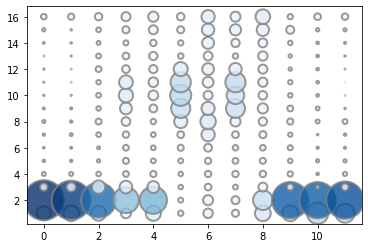

In [12]:
bubble17 = bubb[bubb['Year'] ==2017]
bubble18 = bubb[bubb['Year'] ==2018]
bubble19 = bubb[bubb['Year'] ==2019]
x = bubble17['Month']
y = bubble17['Direction']
z = bubble17['Probability']
plt.scatter(x,y,s=z*20,c=z ,cmap="Blues", alpha=0.8, edgecolors="grey", linewidth=2)

Text(0.5, 0.9, 'Monthly Probability of Wind Direction (2017~2019)')

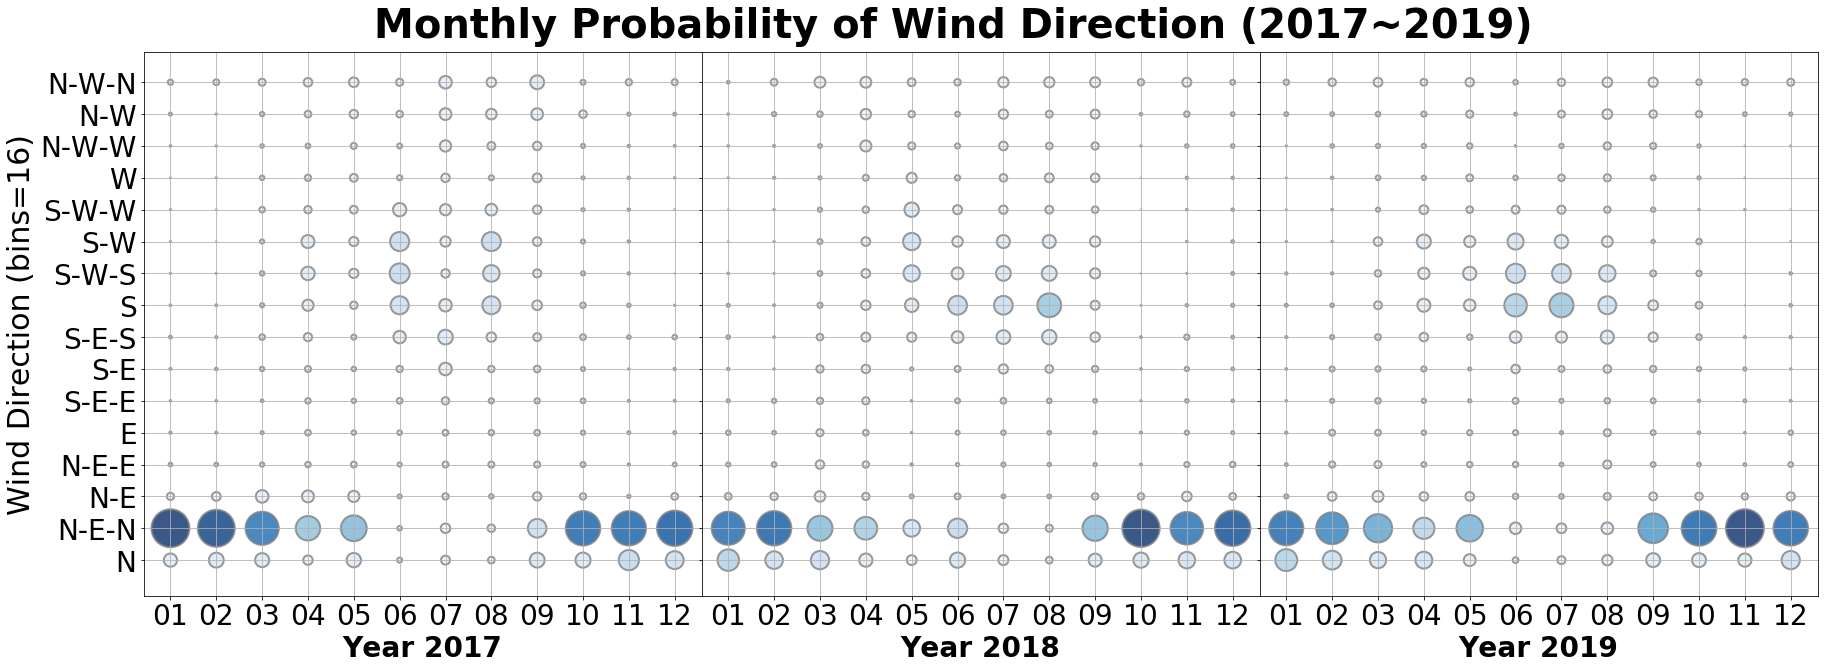

In [17]:
import matplotlib.pyplot as plt
d_name = ['N','N-E-N','N-E','N-E-E',
          'E','S-E-E','S-E','S-E-S',
          'S','S-W-S','S-W','S-W-W',
          'W','N-W-W','N-W','N-W-N']
#bubb['Mon'] = bubb['Month'].apply(lambda x: x[:3])
m_name = ["01","02","03","04","05","06","07","08","09","10","11","12"]
year = [2017,2018,2019]
#Settings
xk = x.unique()
yk = np.linspace(1, 16, num=16)

fig, ax = plt.subplots(1,len(year),sharey=True, figsize=(30, 10), gridspec_kw = {'wspace':0, 'hspace':0})
#ax1 = fig.add_subplot(211)
for i in range(len(year)):
    bubble_plot = bubb[bubb['Year'] ==year[i]]
    x = bubble_plot['Month']
    y = bubble_plot['Direction']
    z = bubble_plot['Probability']
    ax[i].scatter(x,y,s=z*18,c=z ,cmap="Blues", alpha=0.8, edgecolors="grey", linewidth=2)
    ax[i].tick_params(axis="x", labelsize=28)
    xk = x.unique()
    ax[i].set_xticks(xk)
    ax[i].set_xticklabels(m_name)
    ax[i].set_xlabel("Year {}".format(year[i]), fontsize=28, fontweight='bold')
    ax[i].grid()

ax[0].set_ylabel("Wind Direction (bins=16)", fontsize=30)
ax[0].set_yticks(yk)   
ax[0].set_yticklabels(d_name)  
ax[0].tick_params(axis="y", labelsize=28)
#fig.text(0.5, 0.02, 'Time', ha='center',size=24)
#plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
fig.text(0.5, 0.9, 'Monthly Probability of Wind Direction (2017~2019)', ha='center',fontweight='bold',size=40)
#plt.show()